In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
from nltk.classify import DecisionTreeClassifier
from nltk.classify import NaiveBayesClassifier

In [2]:
data_set = pd.read_csv("mbti_1.csv")
data_set.tail()

type                                              posts
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

In [3]:
data_set.isnull().any()

type     False
posts    False
dtype: bool

In [4]:
data_set.shape

(8675, 2)

In [5]:
data_set.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [6]:
len(data_set.iloc[1,1].split('|||'))

50

In [7]:
types = np.unique(np.array(data_set['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [8]:
total = data_set.groupby(['type']).count()*50
total

posts
type       
ENFJ   9500
ENFP  33750
ENTJ  11550
ENTP  34250
ESFJ   2100
ESFP   2400
ESTJ   1950
ESTP   4450
INFJ  73500
INFP  91600
INTJ  54550
INTP  65200
ISFJ   8300
ISFP  13550
ISTJ  10250
ISTP  16850

Text(0.5, 1.0, 'Total posts for each personality type')

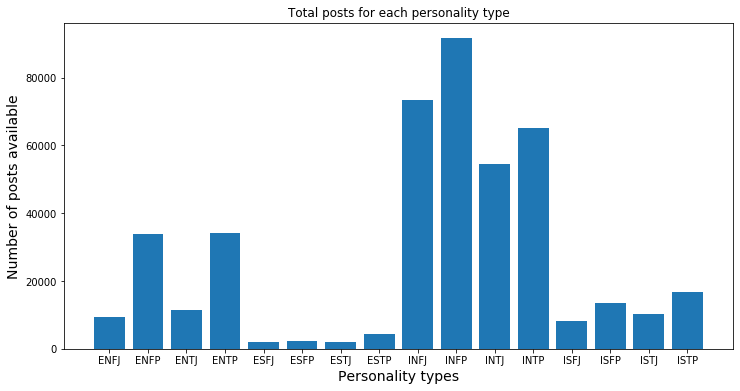

In [9]:
plt.figure(figsize = (12,6))

plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

In [10]:
all_posts= pd.DataFrame()
for j in types:
    temp1 = data_set[data_set['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [11]:
all_posts.tail()

ENFJ  \
9283  I am VERY particular. And I have not dated cer...   
9284  Could you not tell the guy was INTP?  Is that ...   
9285  I cannot speak for all ENFJ's, but I am hard-w...   
9286  Of course you do not see the point of the vide...   
9287  The types fit because the way they use their c...   

                                                   ENFP  \
9283  'Very true.  The thing is to recognize and ove...   
9284  i'm not real sure it's a great idea to date un...   
9285  Watch some comedies, kids are joyful and make ...   
9286  Meditation is great! Read up on TFT and EFT ta...   
9287  2 Physical Touch   7 Quality Time   7 Words of...   

                                                   ENTJ  \
9283  Um, totally off ROFL. I am female, 30, no opin...   
9284                             Hahah that's hilarious   
9285  https://www.onlineassessmenttool.com/instinctu...   
9286                                   ENTJ - idunno...   
9287  I miscarried recently and was quite distraught...   

                                                   ENTP ESFJ ESFP ESTJ ESTP  \
9283  Actually I was none of these labels of alpha o...  NaN  NaN  NaN  NaN   
9284                           Double post, dammit. >_<  NaN  NaN  NaN  NaN   
9285  Radicalism 83 Socialism 100 Tenderness 71.875 ...  NaN  NaN  NaN  NaN   
9286  Quoted for astonishing truth.  One thing thoug...  NaN  NaN  NaN  NaN   
9287  Sure. I was taken aback by what I saw (and pre...  NaN  NaN  NaN  NaN   

                                                   INFJ  \
9283  'So, hey everyone, me again. :happy:  I want t...   
9284  Put these all together, and you have a fair id...   
9285  I need to let go of my tendency to take too la...   
9286  Hello, and welcome to the forum!!! :D There's ...   
9287  Oh that's just cruel. :D I'm going to go and G...   

                                                   INFP  \
9283  Fantastic, I've avoided having to make my own ...   
9284  I suppose in some respect, I used to be that w...   
9285  I only know one in real life, but personally, ...   
9286  Am I evil? is a question I've asked myself tim...   
9287  I've yet to meet an ENFJ in real life but you ...   

                                                   INTJ  \
9283  Arwen - Lord of the Rings  Her faithfulness, r...   
9284  I'm taking this path myself right now, and I'm...   
9285  If only! My life would be so much more ruthles...   
9286  I don't know, maybe because I'm a Jungian mutt...   
9287  I do not watch TV, period. I haven't since 200...   

                                                   INTP ISFJ  \
9283  i love romance. i love the idea of inside joke...  NaN   
9284  so not fair for those of us who are insecure a...  NaN   
9285  i hadn't heard of this, but i feel it's true i...  NaN   
9286  that's funny to me because i saved my chat log...  NaN   
9287          wow. i just fell in love with myself  lol  NaN   

                                                   ISFP  \
9283  If it still serves a meaningful purpose, I don...   
9284  LOL I'm glad I could remind you of that. But y...   
9285  LOL. Thanks for making my day...INTPs are so f...   
9286  That's fair I guess, but you're still trying t...   
9287  A lot of your responses seemed to indicate a p...   

                                                   ISTJ  \
9283  Everything points to ISTJ for me, but then som...   
9284                           I think ESFJ is possible   
9285  I disagree that Brandon is an INTJ. He cares a...   
9286  I thought so, but I don't think she rambles as...   
9287  Cmart animalfromthesea you are both probably r...   

                                                   ISTP  
9283  Group One I tend to be sociable, but sometimes...  
9284        https://www.youtube.com/watch?v=22wU-UITRIA  
9285  I'm trying to think... my first two detentions...  
9286  I think you can.  You should never let your pe...  
9287  I think it's just a part of human nature to ca...

In [12]:
import nltk
nltk.download('stopwords')
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_features_filtered(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('punkt')
build_bag_of_words_features_filtered(all_posts['INTJ'].iloc[1])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'Dear': 1,
 'ENTJ': 1,
 'sub': 1,
 'Long': 1,
 'time': 1,
 'see': 1,
 'Sincerely': 1,
 'Alpha': 1}

In [14]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() 
    features += [[(build_bag_of_words_features_filtered(i), j) \
    for i in temp1]]

In [15]:
split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split,dtype = int)

In [17]:
split
features

[[({"'https": 1, '//www.youtube.com/watch': 1, 'v=PLAaiKvHvZs': 1}, 'ENFJ'),
  ({'51': 1}, 'ENFJ'),
  ({'I': 1,
    'went': 1,
    'break': 1,
    'months': 1,
    'ago': 1,
    'We': 1,
    'together': 1,
    '4': 1,
    'years': 1,
    'planned': 1,
    'life': 1,
    'around': 1,
    'relationship': 1,
    "n't": 1,
    'one': 1,
    'breaking': 1,
    'might': 1,
    'imagine': 1,
    '...': 1},
   'ENFJ'),
  ({'ENFJ': 1, 'Puns': 1, 'many': 1, 'puns': 1}, 'ENFJ'),
  ({'Well': 1,
    'I': 1,
    'personally': 1,
    "n't": 1,
    'go': 1,
    'much': 1,
    'attractiveness': 1,
    'general': 1,
    'see': 1,
    'change': 1,
    "'s": 1,
    'good': 1,
    'already': 1,
    'May': 1,
    'ask': 1,
    'want': 1,
    'merely': 1,
    'sexual': 1,
    '...': 1},
   'ENFJ'),
  ({'Sorry': 1,
    'INFP': 1,
    'I': 1,
    "'m": 1,
    'really': 1,
    'post-rock': 1,
    'post': 1,
    'Going': 1,
    'leave': 1,
    'sneak': 1,
    'D': 1,
    'https': 1,
    '//www.youtube.com/watch'

In [18]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [19]:
sentiment_classifier = NaiveBayesClassifier.train(train)

In [20]:
nltk.classify.util.accuracy(sentiment_classifier, train)*100

43.898071767908334

In [21]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [22]:
nltk.classify.util.accuracy(sentiment_classifier, test)*100


10.242933410586435

In [23]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [24]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [25]:
IntroExtro = NaiveBayesClassifier.train(train)

In [26]:
nltk.classify.util.accuracy(IntroExtro, train)*100

81.12443979837917

In [27]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [28]:
nltk.classify.util.accuracy(IntroExtro, test)*100


58.20055456689981

In [29]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [30]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [31]:
IntuitionSensing = NaiveBayesClassifier.train(train)


In [32]:
nltk.classify.util.accuracy(IntuitionSensing, train)*100


70.13748901638496

In [33]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [34]:
nltk.classify.util.accuracy(IntuitionSensing, test)*100


54.46037837473911

In [35]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [36]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [37]:
ThinkingFeeling = NaiveBayesClassifier.train(train)

In [38]:
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

80.02939441299151

In [39]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [40]:
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

59.39245954558623

In [41]:
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

In [42]:
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [43]:
JudgingPercieiving = NaiveBayesClassifier.train(train)

In [44]:
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

79.77685086475465

In [45]:
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [46]:
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

54.43860447792079

In [47]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

Introvert - Extrovert  Intuition - Sensing  Thinking - Feeling  \
train              81.124440            70.145242           80.034569   
test               58.204693            54.462623           59.413152   

       Judging - Percieiving  
train              79.793411  
test               54.405496

Text(0.5, 1.0, 'Total posts for each personality type')

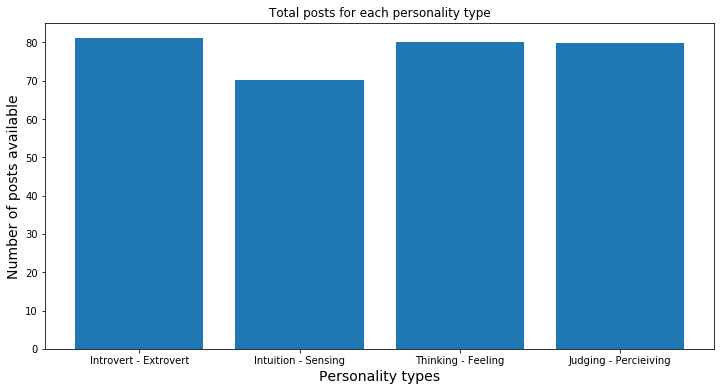

In [48]:
plt.figure(figsize = (12,6))
plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

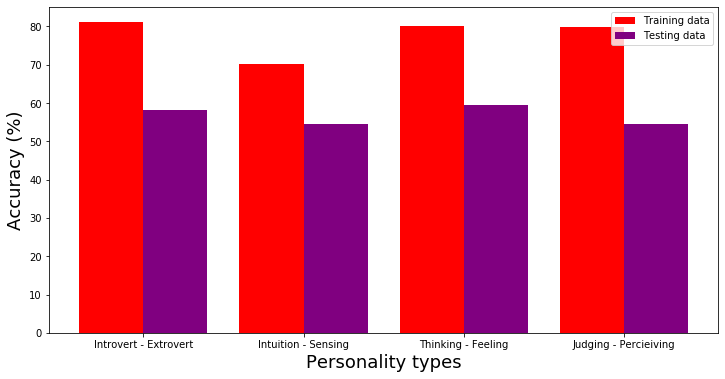

In [62]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='red')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='purple')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Personality types', size = 18)
ax.set_ylabel('Accuracy (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Training data', 'Testing data'))
plt.show()

In [57]:

def main():
   menu()
def menu():
    #print("**************************")
    print()

    choice = input("""
                      A: to check out your personality
                      Please enter your choice: """)

    if choice == "A" or choice =="a":
        MBTI()
        
def MBTI():
    n = input("tell about yourself:")
    tokenize = build_bag_of_words_features_filtered(n)
    ie = IntroExtro.classify(tokenize)
    Is = IntuitionSensing.classify(tokenize)
    tf = ThinkingFeeling.classify(tokenize)
    jp = JudgingPercieiving.classify(tokenize)
    
    mbt = ''
    
    if(ie == 'introvert'):
        mbt+='I'
    if(ie == 'extrovert'):
        mbt+='E'
    if(Is == 'Intuition'):
        mbt+='N'
    if(Is == 'Sensing'):
        mbt+='S'
    if(tf == 'Thinking'):
        mbt+='T'
    if(tf == 'Feeling'):
        mbt+='F'
    if(jp == 'Judging'):
        mbt+='J'
    if(jp == 'Percieving'):
        mbt+='P'
    print(mbt)
main()



                      A: to check out your personality
                      Please enter your choice: a
tell about yourself:so for now..just laugh at the confusion.
INFP
